In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [3]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [5]:
d = np.zeros([p.shape[0], q.shape[0]])
d

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [9]:
p1 = p[0, :]
p2 = q[0, :]
p1, p2
# p1 = p[0, :]

(array([0.77132064, 0.02075195]), array([0.16911084, 0.08833981]))

In [11]:
(p1-p2)**2

array([0.36265665, 0.00456812])

In [13]:
np.sum( (p1-p2)**2 )

0.3672247707609204

In [14]:
euclidean_distance(p1, p2)

0.6059907348804273

In [10]:
def euclidean_distance(p1, p2):
    """Computes euclidean distance between p1 and p2.
    
    Parameters:
    -----------
    p1: n-by-1 array, contains coordinates of point p1
    p2: n-by-1 array, contains coordinates of point p2
    
    Returns:
    --------
    euclidean distance between p1 and p2, i.e. sqrt( sum_i( (p1_i - p2_i)^2 ) ).
    """
    return np.sqrt(np.sum( (p1 - p2)**2 ))

In [15]:
def naive(p, q):
    ''' fill your code in here...
    '''
    n_p = p.shape[0]
    n_q = q.shape[0]
    d = np.zeros([n_p, n_q])
    for i in range(n_p):
        for j in range(n_q):
            d[i, j] = euclidean_distance(p[i, :], q[j, :])
    return d

In [16]:
d = naive(p, q)
d

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [18]:
np.indices((p.shape[0], q.shape[0]))

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [19]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [20]:
rows.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [23]:
p.shape, p[rows.ravel()].shape

((4, 2), (20, 2))

In [21]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [27]:
def get_ready_to_compute_distances(p, q):
    n_p = p.shape[0]
    n_q = q.shape[0]
    rows, cols = np.indices((n_p, n_q))
    return p[rows.ravel()], q[cols.ravel()]

In [28]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    n_p = p.shape[0]
    n_q = q.shape[0]
    p_ready, q_ready = get_ready_to_compute_distances(p, q)
    return np.sqrt( np.sum((p_ready - q_ready)**2, axis=1) ).reshape((n_p, n_q))

In [29]:
with_indices(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [40]:
print(cdist.__doc__)


    Compute distance between each pair of the two collections of inputs.

    See Notes for common calling conventions.

    Parameters
    ----------
    XA : ndarray
        An :math:`m_A` by :math:`n` array of :math:`m_A`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    XB : ndarray
        An :math:`m_B` by :math:`n` array of :math:`m_B`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    metric : str or callable, optional
        The distance metric to use.  If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
        'wminkowski', 'yule'.
    *args : tuple. 

In [37]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [34]:
p[:, np.newaxis,:]

array([[[0.77132064, 0.02075195]],

       [[0.63364823, 0.74880388]],

       [[0.49850701, 0.22479665]],

       [[0.19806286, 0.76053071]]])

In [36]:
p[:, np.newaxis,:].shape, q[np.newaxis,:,:].shape

((4, 1, 2), (1, 5, 2))

In [33]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [38]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

220 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.3 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
972 µs ± 8.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.58 ms ± 88 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


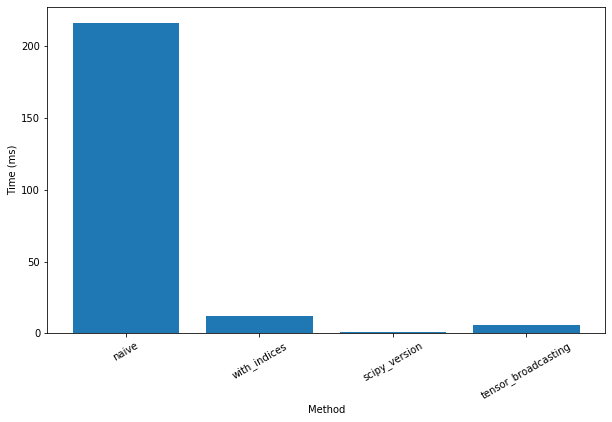

In [41]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)), [f.__name__ for f in methods], rotation=30)
# plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()